<a href="https://colab.research.google.com/github/KRIOS217/Python_Class_Fall_23/blob/main/Capstone_Python_Project_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
import numpy as np
import pandas as pd
from numpy.random import randn
np.random.seed(123)

In [ ]:
# The goal is to look at job posting data for 2023 on Linkedin. Dataset was found on Kaggle.
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Linkedin Job Posting Data 2023 Kaggle/job_postings.csv')

In [ ]:
#Check if dataset is above 20,000 rows
df.shape

(33246, 28)

In [ ]:
df.head()

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,...,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,scraped
0,3757940104,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,NaN,5250.00,NaN,MONTHLY,Full-time,"Little River, SC",...,NaN,Entry level,NaN,1.699090e+12,careers-demant.icims.com,0,FULL_TIME,USD,BASE_SALARY,1699138101
1,3757940025,2192142.0,Shipping & Receiving Associate 2nd shift (Beav...,Metalcraft of Mayville\nMetalcraft of Mayville...,NaN,NaN,NaN,NaN,Full-time,"Beaver Dam, WI",...,NaN,NaN,NaN,1.699080e+12,www.click2apply.net,0,FULL_TIME,NaN,NaN,1699085420
2,3757938019,474443.0,"Manager, Engineering",\nThe TSUBAKI name is synonymous with excellen...,NaN,NaN,NaN,NaN,Full-time,"Bessemer, AL",...,NaN,NaN,Bachelor's Degree in Mechanical Engineering pr...,1.699080e+12,www.click2apply.net,0,FULL_TIME,NaN,NaN,1699085644
3,3757938018,18213359.0,Cook,descriptionTitle\n\n Looking for a great oppor...,NaN,22.27,NaN,HOURLY,Full-time,"Aliso Viejo, CA",...,NaN,Entry level,NaN,1.699080e+12,jobs.apploi.com,0,FULL_TIME,USD,BASE_SALARY,1699087461
4,3757937095,437225.0,Principal Cloud Security Architect (Remote),"Job Summary\nAt iHerb, we are on a mission to ...",275834.0,NaN,205956.0,YEARLY,Full-time,United States,...,NaN,Mid-Senior level,NaN,1.699090e+12,careers.iherb.com,0,FULL_TIME,USD,BASE_SALARY,1699085346


In [ ]:
df.rename(columns={'formatted_experience_level': 'experience level'}, inplace=True)

In [ ]:
df.head()

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,...,closed_time,experience level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,scraped
0,3757940104,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,NaN,5250.00,NaN,MONTHLY,Full-time,"Little River, SC",...,NaN,Entry level,NaN,1.699090e+12,careers-demant.icims.com,0,FULL_TIME,USD,BASE_SALARY,1699138101
1,3757940025,2192142.0,Shipping & Receiving Associate 2nd shift (Beav...,Metalcraft of Mayville\nMetalcraft of Mayville...,NaN,NaN,NaN,NaN,Full-time,"Beaver Dam, WI",...,NaN,NaN,NaN,1.699080e+12,www.click2apply.net,0,FULL_TIME,NaN,NaN,1699085420
2,3757938019,474443.0,"Manager, Engineering",\nThe TSUBAKI name is synonymous with excellen...,NaN,NaN,NaN,NaN,Full-time,"Bessemer, AL",...,NaN,NaN,Bachelor's Degree in Mechanical Engineering pr...,1.699080e+12,www.click2apply.net,0,FULL_TIME,NaN,NaN,1699085644
3,3757938018,18213359.0,Cook,descriptionTitle\n\n Looking for a great oppor...,NaN,22.27,NaN,HOURLY,Full-time,"Aliso Viejo, CA",...,NaN,Entry level,NaN,1.699080e+12,jobs.apploi.com,0,FULL_TIME,USD,BASE_SALARY,1699087461
4,3757937095,437225.0,Principal Cloud Security Architect (Remote),"Job Summary\nAt iHerb, we are on a mission to ...",275834.0,NaN,205956.0,YEARLY,Full-time,United States,...,NaN,Mid-Senior level,NaN,1.699090e+12,careers.iherb.com,0,FULL_TIME,USD,BASE_SALARY,1699085346


In [ ]:
# Locating any columns with null values for data cleaning. I plan to supplement the min-median-max salary NaN values based on the data found in the adjacent columns.
#Data cleaning will be done last after general analysis
df.isnull().sum()

job_id                      0
company_id                654
title                       0
description                 1
max_salary              22135
med_salary              31005
min_salary              22135
pay_period              19894
formatted_work_type         0
location                    0
applies                 17008
original_listed_time        0
remote_allowed          28444
views                    7360
job_posting_url             0
application_url         12250
application_type            0
expiry                      0
closed_time             32074
experience level         9181
skills_desc             32909
listed_time                 0
posting_domain          13558
sponsored                   0
work_type                   0
currency                19894
compensation_type       19894
scraped                     0
dtype: int64

In [ ]:
df.columns

Index(['job_id', 'company_id', 'title', 'description', 'max_salary',
       'med_salary', 'min_salary', 'pay_period', 'formatted_work_type',
       'location', 'applies', 'original_listed_time', 'remote_allowed',
       'views', 'job_posting_url', 'application_url', 'application_type',
       'expiry', 'closed_time', 'experience level', 'skills_desc',
       'listed_time', 'posting_domain', 'sponsored', 'work_type', 'currency',
       'compensation_type', 'scraped'],
      dtype='object')

In [ ]:
df1=df[['job_id', 'company_id', 'title', 'description', 'max_salary','med_salary', 'min_salary', 'pay_period', 'formatted_work_type','location', 'original_listed_time', 'remote_allowed',
        'experience level', 'skills_desc','listed_time','work_type', 'currency']]

In [ ]:
df1.head()

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,original_listed_time,remote_allowed,experience level,skills_desc,listed_time,work_type,currency
0,3757940104,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,NaN,5250.00,NaN,MONTHLY,Full-time,"Little River, SC",1.699090e+12,NaN,Entry level,NaN,1.699090e+12,FULL_TIME,USD
1,3757940025,2192142.0,Shipping & Receiving Associate 2nd shift (Beav...,Metalcraft of Mayville\nMetalcraft of Mayville...,NaN,NaN,NaN,NaN,Full-time,"Beaver Dam, WI",1.699080e+12,NaN,NaN,NaN,1.699080e+12,FULL_TIME,NaN
2,3757938019,474443.0,"Manager, Engineering",\nThe TSUBAKI name is synonymous with excellen...,NaN,NaN,NaN,NaN,Full-time,"Bessemer, AL",1.699080e+12,NaN,NaN,Bachelor's Degree in Mechanical Engineering pr...,1.699080e+12,FULL_TIME,NaN
3,3757938018,18213359.0,Cook,descriptionTitle\n\n Looking for a great oppor...,NaN,22.27,NaN,HOURLY,Full-time,"Aliso Viejo, CA",1.699080e+12,NaN,Entry level,NaN,1.699080e+12,FULL_TIME,USD
4,3757937095,437225.0,Principal Cloud Security Architect (Remote),"Job Summary\nAt iHerb, we are on a mission to ...",275834.0,NaN,205956.0,YEARLY,Full-time,United States,1.698970e+12,1.0,Mid-Senior level,NaN,1.699090e+12,FULL_TIME,USD


In [ ]:
# Split 'location' into 2 seperate columns for additional filtering options
df1[["city", "state"]] = df1["location"].str.split("," , n=1 ,expand = True)

<ipython-input-12-5f6dec1a8892>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[["city", "state"]] = df1["location"].str.split("," , n=1 ,expand = True)
<ipython-input-12-5f6dec1a8892>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[["city", "state"]] = df1["location"].str.split("," , n=1 ,expand = True)


In [ ]:
# Filter dataset where the 'title' column contains 'Data Analyst', ignore NaN to avoid 'ValueError: Cannot mask with non-boolean array containing NA / NaN values'
df2 = df1[df1["title"].str.contains("Data Analyst", na=False)]

In [ ]:
df2.shape

(91, 19)

In [ ]:
# Checked for outlier values that may need to be updated
df2['state'].unique()

array([' DC', None, ' IL', ' TX', ' CA', ' ME', ' OH', ' NC',
       ' Texas Metropolitan Area', ' NY', ' NJ', ' TN', ' VA', ' OR',
       ' WI', ' FL', ' CT', ' United States', ' PA', ' HI', ' GA', ' NE',
       ' IN', ' MD', ' CO', ' MO', ' WA', ' MN', ' OK'], dtype=object)

In [ ]:
# Used replace function to update the outlier values to be consistent with rest of dataset
df2['state'] = df2['state'].replace({' Texas Metropolitan Area': ' TX'})

<ipython-input-16-fc939740e428>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['state'] = df2['state'].replace({' Texas Metropolitan Area': ' TX'})


In [ ]:
# We see 'United States' is not consistent with the rest of the 'state' values. Rows 9858 , 16897 , 31082 must be updated to CA , HI, MD
filt= df2[(df2['state'] == ' United States')]
filt

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,original_listed_time,remote_allowed,experience level,skills_desc,listed_time,work_type,currency,city,state
9858,3756112944,1088079.0,Senior Data Analyst,"The Company:Sungrow Power Supply Co., Ltd. (“S...",NaN,NaN,NaN,NaN,Full-time,"California, United States",1.699060e+12,1.0,Associate,NaN,1.699060e+12,FULL_TIME,NaN,California,United States
16897,3748844912,34237.0,Data Analyst,The position of Data Processing Systems Analys...,NaN,NaN,NaN,NaN,Full-time,"Hawaii, United States",1.698970e+12,NaN,Associate,NaN,1.698970e+12,FULL_TIME,NaN,Hawaii,United States
31082,3693051072,10577525.0,Power BI Data Analyst – (Remote),Power BI Data Analyst – (Remote) CARIAN is gro...,NaN,NaN,NaN,NaN,Full-time,"Maryland, United States",1.692730e+12,1.0,Associate,NaN,1.692730e+12,FULL_TIME,NaN,Maryland,United States


In [ ]:
filt['city'].unique()

array(['California', 'Hawaii', 'Maryland'], dtype=object)

In [ ]:
#Since there are just 3 rows with this discrepancy for the job title we are searching for, we can update using loc
df2.loc[df2['city'] == 'California', 'state'] = ' CA'
df2.loc[df2['city'] == 'Hawaii', 'state'] = ' HI'
df2.loc[df2['city'] == 'Maryland', 'state'] = ' MD'

In [ ]:
# Checking to see if values have been successfully updated
df2.loc[[9858, 16897, 31082]]

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,original_listed_time,remote_allowed,experience level,skills_desc,listed_time,work_type,currency,city,state
9858,3756112944,1088079.0,Senior Data Analyst,"The Company:Sungrow Power Supply Co., Ltd. (“S...",NaN,NaN,NaN,NaN,Full-time,"California, United States",1.699060e+12,1.0,Associate,NaN,1.699060e+12,FULL_TIME,NaN,California,CA
16897,3748844912,34237.0,Data Analyst,The position of Data Processing Systems Analys...,NaN,NaN,NaN,NaN,Full-time,"Hawaii, United States",1.698970e+12,NaN,Associate,NaN,1.698970e+12,FULL_TIME,NaN,Hawaii,HI
31082,3693051072,10577525.0,Power BI Data Analyst – (Remote),Power BI Data Analyst – (Remote) CARIAN is gro...,NaN,NaN,NaN,NaN,Full-time,"Maryland, United States",1.692730e+12,1.0,Associate,NaN,1.692730e+12,FULL_TIME,NaN,Maryland,MD


In [ ]:
#Filtering top 5 states with the most job postings containing 'Data Analyst' in the title
df2.groupby(['state'])['state'].count().sort_values(ascending=False).head(5)

state
 CA    10
 TX     8
 VA     6
 NC     6
 FL     4
Name: state, dtype: int64

In [ ]:
# Experience level requested on job postings for Data Analyst in dataset
df2.groupby(['experience level'])['experience level'].count().sort_values(ascending=False)

experience level
Mid-Senior level    36
Entry level         14
Associate            9
Internship           2
Name: experience level, dtype: int64

In [ ]:
df2.groupby(['experience level','work_type'])['work_type'].count().sort_values(ascending=False)

experience level  work_type 
Mid-Senior level  FULL_TIME     27
Entry level       FULL_TIME     13
Mid-Senior level  CONTRACT       9
Associate         FULL_TIME      6
                  CONTRACT       3
Entry level       CONTRACT       1
Internship        INTERNSHIP     1
                  PART_TIME      1
Name: work_type, dtype: int64

In [ ]:
# Of the 91 job postings, only 24 are remote
df2.groupby(['remote_allowed'])['remote_allowed'].count().sort_values(ascending=False)

remote_allowed
1.0    24
Name: remote_allowed, dtype: int64

In [ ]:
# Filtering for 'Python' mentioned in job description
df_pyth= df2[df2["description"].str.contains("Python", na=False)]

In [ ]:
df_pyth.shape

(27, 19)

In [ ]:
#How many of these job descriptions mention 'Python'?
df_pyth.groupby(['experience level'])['experience level'].count().sort_values(ascending=False)

experience level
Mid-Senior level    17
Entry level          5
Associate            1
Name: experience level, dtype: int64

In [ ]:
df1.isnull().sum()

job_id                      0
company_id                654
title                       0
description                 1
max_salary              22135
med_salary              31005
min_salary              22135
pay_period              19894
formatted_work_type         0
location                    0
original_listed_time        0
remote_allowed          28444
experience level         9181
skills_desc             32909
listed_time                 0
work_type                   0
currency                19894
city                        0
state                    3895
dtype: int64

In [ ]:
df_salary=df1[['title','max_salary','med_salary', 'min_salary','pay_period','experience level']]

In [ ]:
#Checking the value types
df_salary.dtypes

title                object
max_salary          float64
med_salary          float64
min_salary          float64
pay_period           object
experience level     object
dtype: object

In [ ]:
#Fill NA for max & min with a 0 value.
df_salary[['max_salary','med_salary','min_salary']] = df_salary[['max_salary','med_salary','min_salary']].fillna(0)

<ipython-input-31-70e94a17d48e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_salary[['max_salary','med_salary','min_salary']] = df_salary[['max_salary','med_salary','min_salary']].fillna(0)


In [ ]:
df_salary.head()

,title,max_salary,med_salary,min_salary,pay_period,experience level
0,Hearing Care Provider,0.0,5250.00,0.0,MONTHLY,Entry level
1,Shipping & Receiving Associate 2nd shift (Beav...,0.0,0.00,0.0,NaN,NaN
2,"Manager, Engineering",0.0,0.00,0.0,NaN,NaN
3,Cook,0.0,22.27,0.0,HOURLY,Entry level
4,Principal Cloud Security Architect (Remote),275834.0,0.00,205956.0,YEARLY,Mid-Senior level


In [ ]:
df_salary.dtypes

title                object
max_salary          float64
med_salary          float64
min_salary          float64
pay_period           object
experience level     object
dtype: object

In [ ]:
#Convert to int64
dfint = df_salary.astype({"max_salary":'int64',"med_salary": 'int64',"min_salary":'int64'})
dfint.dtypes

title               object
max_salary           int64
med_salary           int64
min_salary           int64
pay_period          object
experience level    object
dtype: object

In [ ]:
dfint.head(5)

,title,max_salary,med_salary,min_salary,pay_period,experience level
0,Hearing Care Provider,0,5250,0,MONTHLY,Entry level
1,Shipping & Receiving Associate 2nd shift (Beav...,0,0,0,NaN,NaN
2,"Manager, Engineering",0,0,0,NaN,NaN
3,Cook,0,22,0,HOURLY,Entry level
4,Principal Cloud Security Architect (Remote),275834,0,205956,YEARLY,Mid-Senior level


In [ ]:
dfint.shape

(33246, 6)

In [ ]:
filt2 = dfint[dfint["title"].str.contains("Data Analyst", na=False)]

In [ ]:
#Find the average of the 3 min,med,max columns
summary_data1 = filt2
summary_data1['average_salary'] = summary_data1.mean(numeric_only=True, axis=1)
summary_data1.head()

<ipython-input-38-e15256a8050f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summary_data1['average_salary'] = summary_data1.mean(numeric_only=True, axis=1)


,title,max_salary,med_salary,min_salary,pay_period,experience level,average_salary
1100,"Data Analyst, Immediate Office (Req No. 2023-1...",119916,0,93069,YEARLY,Entry level,70995.000000
1191,Data Analyst,0,0,0,NaN,NaN,0.000000
1318,"Data Analyst II, Business Operations - Monetiz...",0,0,0,NaN,Entry level,0.000000
1635,Data Analyst,75000,0,65000,YEARLY,NaN,46666.666667
1831,Senior Data Analyst,0,0,0,NaN,Mid-Senior level,0.000000


In [ ]:
summary_data1.shape

(91, 7)

In [ ]:
#Update title to standard "Data Analysts" title
summary_data1.loc[df['title'].str.contains("Data Analyst"), 'title'] = "Data Analyst"
summary_data1.head()

,title,max_salary,med_salary,min_salary,pay_period,experience level,average_salary
1100,Data Analyst,119916,0,93069,YEARLY,Entry level,70995.000000
1191,Data Analyst,0,0,0,NaN,NaN,0.000000
1318,Data Analyst,0,0,0,NaN,Entry level,0.000000
1635,Data Analyst,75000,0,65000,YEARLY,NaN,46666.666667
1831,Data Analyst,0,0,0,NaN,Mid-Senior level,0.000000


In [ ]:
filt3 = dfint[dfint["title"].str.contains("Business Analyst|Financial Analyst|Data Scientist" , na=False)]

In [ ]:
summary_data2 = filt3
summary_data2['average_salary'] = summary_data2.mean(numeric_only=True, axis=1)
summary_data2.head()

<ipython-input-42-b6bd60a2f313>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summary_data2['average_salary'] = summary_data2.mean(numeric_only=True, axis=1)


,title,max_salary,med_salary,min_salary,pay_period,experience level,average_salary
26,Business Analyst Sr - Hybrid Nasville,0,0,0,NaN,Mid-Senior level,0.000000
474,"Senior Financial Analyst, Operations and Manuf...",184000,0,96000,YEARLY,Mid-Senior level,93333.333333
589,Business Analyst,0,0,0,NaN,Mid-Senior level,0.000000
819,"Data Scientist I, Revenue",130000,0,115000,YEARLY,Entry level,81666.666667
853,Sr. Business Analyst,0,0,0,NaN,NaN,0.000000


In [ ]:
summary_data2.shape

(395, 7)

In [ ]:
#Update title to standard "Business Analyst" title
summary_data2.loc[df['title'].str.contains("Business Analyst"), 'title'] = "Business Analyst"
summary_data2.head()

,title,max_salary,med_salary,min_salary,pay_period,experience level,average_salary
26,Business Analyst,0,0,0,NaN,Mid-Senior level,0.000000
474,"Senior Financial Analyst, Operations and Manuf...",184000,0,96000,YEARLY,Mid-Senior level,93333.333333
589,Business Analyst,0,0,0,NaN,Mid-Senior level,0.000000
819,"Data Scientist I, Revenue",130000,0,115000,YEARLY,Entry level,81666.666667
853,Business Analyst,0,0,0,NaN,NaN,0.000000


In [ ]:
#Update title to standard "Finanical Analyst" title
summary_data2.loc[df['title'].str.contains("Financial Analyst"), 'title'] = "Financial Analyst"
summary_data2.head()

,title,max_salary,med_salary,min_salary,pay_period,experience level,average_salary
26,Business Analyst,0,0,0,NaN,Mid-Senior level,0.000000
474,Financial Analyst,184000,0,96000,YEARLY,Mid-Senior level,93333.333333
589,Business Analyst,0,0,0,NaN,Mid-Senior level,0.000000
819,"Data Scientist I, Revenue",130000,0,115000,YEARLY,Entry level,81666.666667
853,Business Analyst,0,0,0,NaN,NaN,0.000000


In [ ]:
#Update title to standard "Data Scientist" title
summary_data2.loc[df['title'].str.contains("Data Scientist"), 'title'] = "Data Scientist"
summary_data2.head()

,title,max_salary,med_salary,min_salary,pay_period,experience level,average_salary
26,Business Analyst,0,0,0,NaN,Mid-Senior level,0.000000
474,Financial Analyst,184000,0,96000,YEARLY,Mid-Senior level,93333.333333
589,Business Analyst,0,0,0,NaN,Mid-Senior level,0.000000
819,Data Scientist,130000,0,115000,YEARLY,Entry level,81666.666667
853,Business Analyst,0,0,0,NaN,NaN,0.000000


In [ ]:
summary_data2.groupby(['title'])['title'].count().sort_values(ascending=False)

title
Business Analyst     201
Financial Analyst    128
Data Scientist        66
Name: title, dtype: int64

In [ ]:
#Filter for hourly salaries for Data Analyst
hourly= summary_data1[(summary_data1['pay_period'] == 'HOURLY')]
hourly.head()

,title,max_salary,med_salary,min_salary,pay_period,experience level,average_salary
3602,Data Analyst,65,0,50,HOURLY,Mid-Senior level,38.333333
4043,Data Analyst,0,23,0,HOURLY,Internship,7.666667
4217,Data Analyst,85,0,60,HOURLY,Mid-Senior level,48.333333
7901,Data Analyst,62,0,48,HOURLY,NaN,36.666667
15754,Data Analyst,0,19,0,HOURLY,NaN,6.333333


In [ ]:
hourly.groupby(['title','experience level','pay_period'])['average_salary'].mean()


title         experience level  pay_period
Data Analyst  Associate         HOURLY        36.666667
              Entry level       HOURLY        14.666667
              Internship        HOURLY         7.666667
              Mid-Senior level  HOURLY        40.428571
Name: average_salary, dtype: float64

In [ ]:
# Yearly Salary for 3 different types of Data Analyst positions
yearly= summary_data2[(summary_data2['pay_period'] == 'YEARLY')]
yearly.head()

,title,max_salary,med_salary,min_salary,pay_period,experience level,average_salary
474,Financial Analyst,184000,0,96000,YEARLY,Mid-Senior level,93333.333333
819,Data Scientist,130000,0,115000,YEARLY,Entry level,81666.666667
1369,Data Scientist,250000,0,200000,YEARLY,Mid-Senior level,150000.000000
1615,Business Analyst,113000,0,76000,YEARLY,Mid-Senior level,63000.000000
1743,Business Analyst,103200,0,68800,YEARLY,Mid-Senior level,57333.333333


In [ ]:
yearly.shape

(114, 7)

In [ ]:
yearly.groupby(['title','pay_period'])['average_salary'].mean()


title              pay_period
Business Analyst   YEARLY        54727.000000
Data Scientist     YEARLY        99419.678571
Financial Analyst  YEARLY        64395.418803
Name: average_salary, dtype: float64

In [ ]:
visual =sns.color_palette("RdBu")
visual

[(0.7561707035755478, 0.21038062283737025, 0.22352941176470587),
 (0.940715109573241, 0.6099192618223759, 0.4812764321414839),
 (0.9856978085351787, 0.8889657823913879, 0.8320645905420992),
 (0.8605151864667436, 0.9174163783160324, 0.9487120338331411),
 (0.530026912725875, 0.7456362937331797, 0.8560553633217994),
 (0.1843137254901961, 0.47266435986159167, 0.7116493656286044)]

In [ ]:
sns.set_style("whitegrid")

[Text(0, 0, '40.4286'),
 Text(0, 0, '36.6667'),
 Text(0, 0, '14.6667'),
 Text(0, 0, '7.66667')]

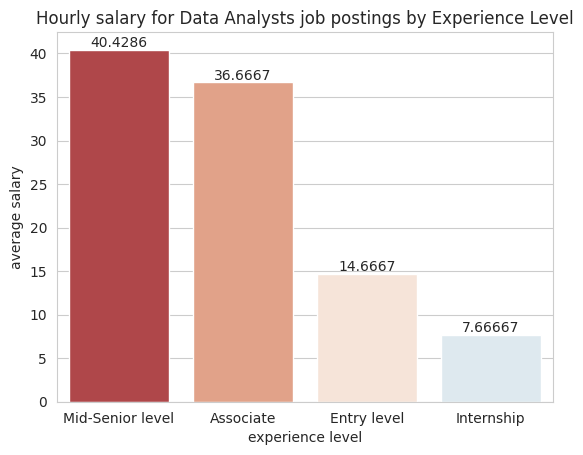

In [ ]:
ax = sns.barplot(x = 'experience level', y = 'average_salary', data = hourly,palette= visual, order = ['Mid-Senior level','Associate','Entry level','Internship'],errorbar=None)
ax.set_title('Hourly salary for Data Analysts job postings by Experience Level')
ax.set_ylabel('average salary')
ax.bar_label(ax.containers[0])

Text(0.5, 0, 'average salary')

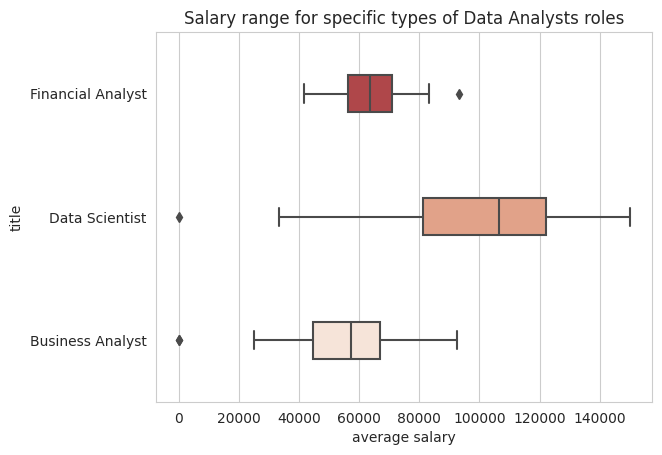

In [ ]:
# Experience level salary range for Data Analysts yearly
ax2 = sns.boxplot(x = 'average_salary' , y = 'title', data = yearly,palette= visual,width=0.3)
ax2.set_title('Salary range for specific types of Data Analysts roles')
ax2.set_xlabel('average salary')

